In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
df =pd.read_csv('analytics_data.txt')
df['date'] = df['date'].apply(str)
df['date'] = pd.to_datetime(df['date'], format="%Y/%m/%d")
df['conversion_rate'] = df['transactions']/df['sessions']
df['bounce_rate'] = df['bounces']/df['sessions']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623076 entries, 0 to 623075
Data columns (total 8 columns):
date               623076 non-null datetime64[ns]
path               623076 non-null object
sessions           623076 non-null int64
bounces            623076 non-null int64
time_on_page       623076 non-null float64
transactions       623076 non-null int64
conversion_rate    623076 non-null float64
bounce_rate        623076 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 38.0+ MB


In [3]:
df[:5]

,date,path,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
0,2017-06-26,/t/100002,2,0,0.0,0,0.00,0.00
1,2017-06-26,/t/100004,2,0,24.8,0,0.00,0.00
2,2017-06-26,/t/100006,3,0,79.8,0,0.00,0.00
3,2017-06-26,/t/100011,4,1,0.0,1,0.25,0.25
4,2017-06-26,/t/100012,4,0,51.4,1,0.25,0.00


In [4]:
df.describe()

,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
count,623076.000000,623076.000000,623076.000000,623076.000000,623076.000000,623076.000000
mean,4.198926,0.275905,128.840786,0.355112,0.074463,0.061756
std,3.816146,2.036844,226.040600,0.536168,0.109250,0.186031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,15.200000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,61.100000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,148.500000,1.000000,0.166667,0.000000
max,587.000000,250.000000,7456.100000,108.000000,0.333333,1.000000


In [5]:
print(df.corr())

                 sessions   bounces  time_on_page  transactions  \
sessions         1.000000  0.728340      0.013722      0.442368   
bounces          0.728340  1.000000     -0.003731      0.146771   
time_on_page     0.013722 -0.003731      1.000000      0.011283   
transactions     0.442368  0.146771      0.011283      1.000000   
conversion_rate  0.101816 -0.037994      0.009076      0.832661   
bounce_rate      0.023380  0.331690     -0.060333     -0.098655   

                 conversion_rate  bounce_rate  
sessions                0.101816     0.023380  
bounces                -0.037994     0.331690  
time_on_page            0.009076    -0.060333  
transactions            0.832661    -0.098655  
conversion_rate         1.000000    -0.141194  
bounce_rate            -0.141194     1.000000  


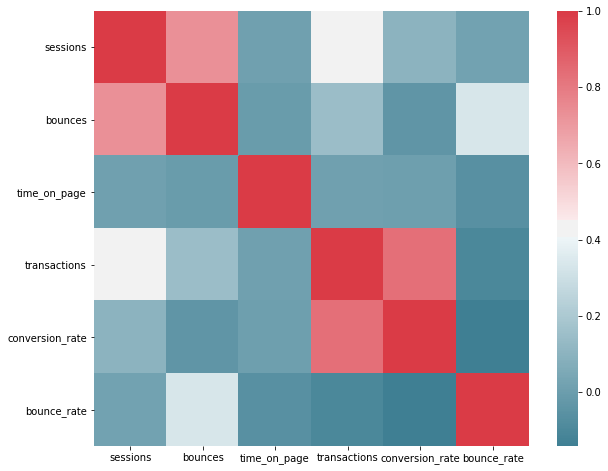

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)
plt.show()

In [25]:
df_sorted_sessions = df.sort_values(['sessions'], ascending=False)
df_sorted_sessions[:10]

,date,path,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
450338,2017-09-06,/t/59429,587,17,339.6,108,0.183986,0.028961
540909,2017-09-20,/t/102626,336,150,270.1,29,0.086310,0.446429
225844,2017-08-02,/t/14263,305,136,132.2,13,0.042623,0.445902
231970,2017-08-03,/t/14263,291,213,206.6,4,0.013746,0.731959
333038,2017-08-19,/t/14263,287,229,192.6,6,0.020906,0.797909
371701,2017-08-25,/t/14263,283,244,252.0,6,0.021201,0.862191
391100,2017-08-28,/t/14263,272,228,125.0,8,0.029412,0.838235
359046,2017-08-23,/t/14263,271,212,169.6,1,0.003690,0.782288
233799,2017-08-03,/t/63896,258,92,161.5,27,0.104651,0.356589
263350,2017-08-08,/t/14263,252,250,227.7,0,0.000000,0.992063


In [24]:
df_sorted_transactions = df.sort_values(['transactions'], ascending=False)
df_sorted_transactions[:10]

,date,path,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
450338,2017-09-06,/t/59429,587,17,339.6,108,0.183986,0.028961
246006,2017-08-05,/t/63896,200,46,114.5,29,0.145000,0.230000
540909,2017-09-20,/t/102626,336,150,270.1,29,0.086310,0.446429
233799,2017-08-03,/t/63896,258,92,161.5,27,0.104651,0.356589
603822,2017-09-29,/t/14263,228,79,225.9,26,0.114035,0.346491
143937,2017-07-20,/t/14263,178,64,180.4,23,0.129213,0.359551
309709,2017-08-15,/t/63896,156,33,116.6,23,0.147436,0.211538
553051,2017-09-21,/t/9346,125,26,131.3,20,0.160000,0.208000
307846,2017-08-15,/t/1465,107,7,147.2,19,0.177570,0.065421
341272,2017-08-20,/t/63896,116,22,78.5,18,0.155172,0.189655


In [37]:
df_sorted_conversion_rate = df.sort_values(['conversion_rate'], ascending=False)
df_sorted_conversion_rate[:10]

,date,path,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
152613,2017-07-21,/t/76632,3,0,54.6,1,0.333333,0.0
79771,2017-07-09,/t/82058,3,0,82.0,1,0.333333,0.0
484812,2017-09-11,/t/92091,3,0,20.6,1,0.333333,0.0
550118,2017-09-21,/t/65296,3,0,430.3,1,0.333333,0.0
212421,2017-07-31,/t/100276,3,0,110.4,1,0.333333,0.0
300395,2017-08-13,/t/99790,3,0,129.7,1,0.333333,0.0
604212,2017-09-29,/t/2810,3,0,740.1,1,0.333333,0.0
454079,2017-09-06,/t/98749,3,0,67.0,1,0.333333,0.0
484798,2017-09-11,/t/91942,3,0,81.3,1,0.333333,0.0
212441,2017-07-31,/t/100346,3,0,43.2,1,0.333333,0.0


In [21]:
df_sorted_bounce_rate = df.sort_values(['bounce_rate'], ascending=False)
df_sorted_bounce_rate[:10]

,date,path,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
153803,2017-07-21,/t/88414,1,1,0.0,0,0.0,1.0
433330,2017-09-03,/t/91137,1,1,0.0,0,0.0,1.0
324795,2017-08-17,/t/91101,1,1,0.0,0,0.0,1.0
156634,2017-07-22,/t/32134,1,1,0.0,0,0.0,1.0
560808,2017-09-23,/t/100712,1,1,0.0,0,0.0,1.0
222982,2017-08-01,/t/83959,2,2,0.0,0,0.0,1.0
156622,2017-07-22,/t/31942,1,1,0.0,0,0.0,1.0
283966,2017-08-11,/t/5225,3,3,0.0,0,0.0,1.0
464483,2017-09-08,/t/83090,1,1,0.0,0,0.0,1.0
489972,2017-09-12,/t/80209,2,2,0.0,0,0.0,1.0


In [22]:
df_sorted_time_on_page = df.sort_values(['time_on_page'], ascending=False)
df_sorted_time_on_page[:10]

,date,path,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
398924,2017-08-29,/t/46389,7,0,7456.1,1,0.142857,0.0
499169,2017-09-13,/t/97717,1,0,7308.6,0,0.000000,0.0
240082,2017-08-04,/t/69936,7,0,7157.1,1,0.142857,0.0
213301,2017-07-31,/t/25433,6,0,7145.6,0,0.000000,0.0
57814,2017-07-05,/t/93181,7,0,6373.9,0,0.000000,0.0
150681,2017-07-21,/t/33235,6,0,6252.5,0,0.000000,0.0
89492,2017-07-11,/t/20605,1,0,6224.8,0,0.000000,0.0
15979,2017-06-28,/t/85788,2,0,6078.4,0,0.000000,0.0
205394,2017-07-29,/t/98729,5,0,5865.9,0,0.000000,0.0
261639,2017-08-07,/t/93590,6,0,5748.2,1,0.166667,0.0


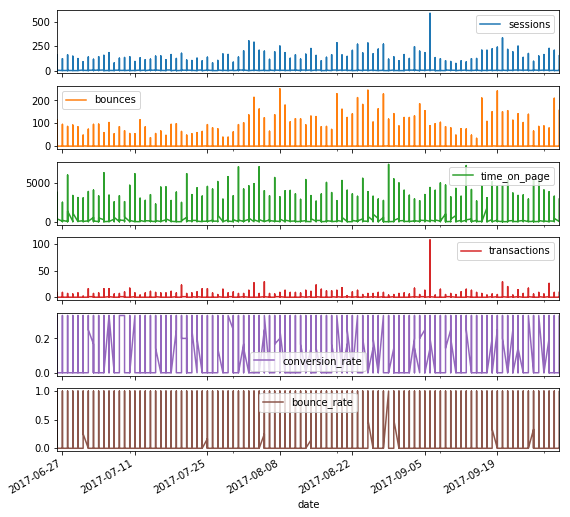

In [15]:
time_series = df.set_index('date')
time_series.plot(subplots=True, figsize=(9,9))
plt.show()
plt.savefig('time_series_subplots.png', transparent=True)

In [27]:
from sklearn.cluster import MiniBatchKMeans
import time
start_time = time.time()

k = 2

from sklearn.preprocessing import StandardScaler

df2 = df[["sessions", "bounce_rate", "time_on_page", "transactions", "conversion_rate","bounces"]]

std_scaler = StandardScaler()
np_norm_data = std_scaler.fit_transform(df2) 
np_norm_data.shape

kmeans = MiniBatchKMeans(n_clusters=k, max_iter=500, 
                        batch_size=1024*8, 
                        max_no_improvement=None, 
                        init_size=3*1024*8, n_init=100, reassignment_ratio=0.05)
kmeans.fit(np_norm_data)

print("Elapsed time was {} seconds".format(time.time() - start_time))

cluster_metrics = std_scaler.inverse_transform(kmeans.cluster_centers_)
cluster_metrics_pd = pd.DataFrame(cluster_metrics, columns=df2.columns)
cluster_metrics_pd['total_rows'] = pd.Series(np.bincount(kmeans.labels_))
cluster_metrics_pd['percent_total_rows'] = pd.Series(np.bincount(kmeans.labels_)) / np_norm_data.shape[0]
cluster_metrics_pd


Elapsed time was 118.07580018043518 seconds


,sessions,bounce_rate,time_on_page,transactions,conversion_rate,bounces,total_rows,percent_total_rows
0,4.144602,0.061492,128.826524,0.352778,0.074472,0.243902,622764,0.999499
1,115.904914,0.585307,122.961779,5.066319,0.041138,66.221282,312,0.000501


In [38]:
df_sorted_conversion_rate = df.sort_values(['conversion_rate'], ascending=False)

df_sorted_conversion_rate = df_sorted_conversion_rate[df_sorted_conversion_rate['sessions'] >= 10]
df_sorted_conversion_rate[:10]

,date,path,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
490968,2017-09-12,/t/88509,14,1,184.0,3,0.214286,0.071429
604978,2017-09-29,/t/49195,14,1,93.7,3,0.214286,0.071429
608005,2017-09-29,/t/91425,10,2,75.9,2,0.200000,0.200000
195586,2017-07-28,/t/59791,10,2,158.5,2,0.200000,0.200000
495388,2017-09-13,/t/5294,10,1,196.0,2,0.200000,0.100000
196758,2017-07-28,/t/80210,10,1,153.7,2,0.200000,0.100000
394367,2017-08-28,/t/83051,10,0,266.1,2,0.200000,0.000000
60202,2017-07-06,/t/45555,10,2,485.7,2,0.200000,0.200000
128160,2017-07-17,/t/79058,10,2,172.8,2,0.200000,0.200000
435171,2017-09-04,/t/101072,10,1,34.1,2,0.200000,0.100000


In [41]:
df_sorted_bounce_rate = df.sort_values(['bounce_rate'], ascending=False)

df_sorted_bounce_rate = df_sorted_bounce_rate[df_sorted_bounce_rate['bounce_rate'] < 1.0]
df_sorted_bounce_rate[:10]

,date,path,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
263350,2017-08-08,/t/14263,252,250,227.7,0,0.000000,0.992063
320762,2017-08-17,/t/14263,87,86,284.4,0,0.000000,0.988506
287982,2017-08-12,/t/100236,101,99,142.9,0,0.000000,0.980198
310350,2017-08-15,/t/74643,38,37,220.6,0,0.000000,0.973684
139653,2017-07-19,/t/63896,101,98,73.7,0,0.000000,0.970297
592811,2017-09-27,/t/74643,31,30,171.3,0,0.000000,0.967742
269819,2017-08-09,/t/14263,185,179,112.3,1,0.005405,0.967568
416635,2017-09-01,/t/102568,28,27,121.1,0,0.000000,0.964286
153861,2017-07-21,/t/88866,27,26,118.9,0,0.000000,0.962963
42946,2017-07-03,/t/63896,24,23,168.3,0,0.000000,0.958333


In [45]:
df.transactions.sum()

221262

In [59]:
df.sessions.sum()

2616250

In [56]:
top_paths = df.set_index(['path'])

In [58]:
top_paths.loc['/t/14263'].sum()

sessions           14432.000000
bounces            10187.000000
time_on_page       13119.500000
transactions         428.000000
conversion_rate        2.856769
bounce_rate           69.492928
dtype: float64

In [60]:
top_paths.sum()

sessions           2.616250e+06
bounces            1.719100e+05
time_on_page       8.027760e+07
transactions       2.212620e+05
conversion_rate    4.639598e+04
bounce_rate        3.847851e+04
dtype: float64

In [61]:
top_paths.sort_values(['sessions'], ascending=False)

,date,sessions,bounces,time_on_page,transactions,conversion_rate,bounce_rate
path,,,,,,,
/t/59429,2017-09-06,587,17,339.6,108,0.183986,0.028961
/t/102626,2017-09-20,336,150,270.1,29,0.086310,0.446429
/t/14263,2017-08-02,305,136,132.2,13,0.042623,0.445902
/t/14263,2017-08-03,291,213,206.6,4,0.013746,0.731959
/t/14263,2017-08-19,287,229,192.6,6,0.020906,0.797909
/t/14263,2017-08-25,283,244,252.0,6,0.021201,0.862191
/t/14263,2017-08-28,272,228,125.0,8,0.029412,0.838235
/t/14263,2017-08-23,271,212,169.6,1,0.003690,0.782288
/t/63896,2017-08-03,258,92,161.5,27,0.104651,0.356589


In [62]:
top_paths.loc['/t/59429'].sum()

sessions            2977.000000
bounces              801.000000
time_on_page       17767.000000
transactions         285.000000
conversion_rate        6.552295
bounce_rate           36.002111
dtype: float64